# Generating Netcdf of GCMs

In [ ]:
!pip install python-cmethods
!pip install zarr
!pip install fsspec
!pip install cartopy
!pip install cftime
!pip install os
!pip install xarray
!pip install zarr
!pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 35.4 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=36818d0a9d87fed1d6488fdd79815c9a1d8775ceefacf05046d3ba3fb5d67fab
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 60.3 MB/s eta 0:00:00
ERROR: Could not find a version that satis

# CMIP6 Historical
Always take larger extent than your intended area, you can crop later

In [ ]:
import pandas as pd
df_all = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_all.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [ ]:
df_ta_hist = df_all.query("table_id == 'day' and variable_id == 'hur' and member_id	== 'r1i1p1f1'	and source_id	== 'CMCC-CM2-SR5' and experiment_id == 'historical' ")
df_ta_hist

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
449924,CMIP,CMCC,CMCC-CM2-SR5,historical,r1i1p1f1,day,hur,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20200616


In [ ]:


print(len(df_ta_hist['source_id'].unique()))


1


In [ ]:
import google.auth.transport.requests
import os
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/path/to/credentials.json"
!pip install google-auth-oauthlib --quiet
import google.oauth2.credentials
!pip install zarr fsspec
!pip install cftime

In [ ]:

import fsspec
import xarray as xr
import cftime

# Ensure zarr is installed and available


# get the path to a specific zarr store
zstore = df_ta_hist.zstore.values[-1]
print(zstore)

# create a mutable-mapping-style interface to the store
mapper = fsspec.get_mapper(zstore, token='anon')

# open it using xarray and zarr, with decode_times=True and use_cftime=True
ds = xr.open_zarr(mapper, consolidated=True, decode_times=True, use_cftime=True)
print(ds)


gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/historical/r1i1p1f1/day/hur/gn/v20200616/
<xarray.Dataset> Size: 107GB
Dimensions:    (time: 60225, plev: 8, lat: 192, lon: 288, bnds: 2)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, bnds) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * plev       (plev) float64 64B 1e+05 8.5e+04 7e+04 ... 1e+04 5e+03 1e+03
  * time       (time) object 482kB 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    time_bnds  (time, bnds) object 964kB dask.array<chunksize=(30113, 1), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    hur        (time, plev, lat, lon) float32 107GB dask.array<chunksize=(40, 8, 192, 288), meta=np.ndarray>
Attributes: (12/51)
    Conventions:            CF-1.7 CMIP-6.2
   

In [ ]:
import xarray as xr
import pandas as pd

# Define the time range and spatial bounds
time_start = '1995-01-01'
time_end = '2014-12-31'
lat_min, lon_min, lat_max, lon_max = 19, 86, 26, 93

# Open the dataset (assuming `ds` is already defined; otherwise, load your dataset here)
# ds = xr.open_dataset('path_to_your_dataset.nc')

# Select the time period
simh = ds.sel(time=slice(time_start, time_end))

# Select the spatial bounds
simh = simh.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Select near-surface humidity by filtering for plev closest to 1000 hPa
if 'plev' in simh.dims:
    simh = simh.sel(plev=100000, method='nearest')  # 100000 Pa = 1000 hPa

# Drop the `plev` dimension after selection (if it still exists in the dataset)
simh = simh.drop_vars('plev', errors='ignore')

# Filter out all February 29th data
simh = simh.sel(time=~((simh['time.month'] == 2) & (simh['time.day'] == 29)))

# Save the modified dataset as a NetCDF file
output_file = 'humidity_near_surface_clipped.nc'
simh.to_netcdf(output_file)

# List the saved NetCDF file
!ls -l *.nc



-rw-r--r-- 1 root root 5912274 Jan 10 10:53 avg_hum_Krigging.nc
-rw-r--r-- 1 root root 1614574 Jan 10 11:00 humidity_near_surface_clipped.nc


In [ ]:

!pip install cftime --quiet
import xarray as xr
ds = xr.open_dataset('/content/humidity_near_surface_clipped.nc', decode_times=False)
print(ds.info())

xarray.Dataset {
dimensions:
	time = 7300 ;
	lat = 8 ;
	lon = 6 ;
	bnds = 2 ;

variables:
	float32 hur(time, lat, lon) ;
		hur:cell_measures = area: areacella ;
		hur:cell_methods = time: mean ;
		hur:comment = The relative humidity with respect to liquid water for T> 0 C, and with respect to ice for T<0 C. ;
		hur:history = 2020-05-27T07:44:37Z altered by CMOR: Converted type from 'd' to 'f'. ;
		hur:long_name = Relative Humidity ;
		hur:original_name = RELHUM (using vinth2p_ecmwf) ;
		hur:standard_name = relative_humidity ;
		hur:units = % ;
	float64 lat(lat) ;
		lat:axis = Y ;
		lat:bounds = lat_bnds ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
	float64 lat_bnds(lat, bnds) ;
	float64 lon(lon) ;
		lon:axis = X ;
		lon:bounds = lon_bnds ;
		lon:long_name = Longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
	float64 lon_bnds(lon, bnds) ;
	int64 time(time) ;
		time:axis = T ;
		time:bounds = time_bnds ;
		time:long

In [ ]:
#  # Ensure zarr is installed.

# import xarray as xr
# import gcsfs

# # get the path to a specific zarr store (the first one from the dataframe above)
# zstore = df_ta_ncar.zstore.values[-1]
# print(zstore)

# # Explicitly provide GCS credentials (replace 'YOUR_PROJECT_ID' with your actual project ID)
# fs = gcsfs.GCSFileSystem(project='YOUR_PROJECT_ID')

# # open it using xarray and zarr, with decode_times=True and use_cftime=True
# # Pass the store and storage options to xr.open_zarr
# ds = xr.open_zarr(zstore, consolidated=True, decode_times=True, storage_options={'project': 'YOUR_PROJECT_ID'})
# ds

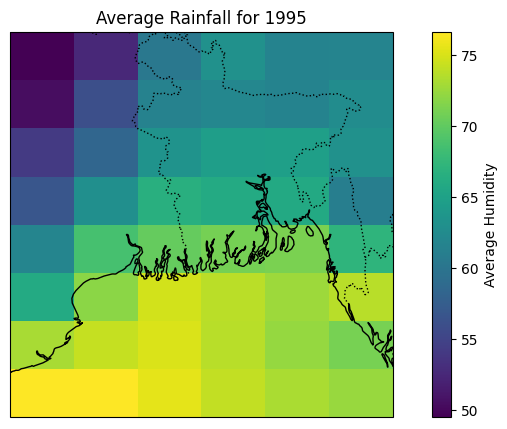

In [ ]:


import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Open the modified dataset
ds = xr.open_dataset('/content/humidity_near_surface_clipped.nc')

# Calculate the annual average
ds_annual = ds.groupby('time.year').mean()

# Select the first year's average
first_year_avg = ds_annual.sel(year=ds_annual.year[0])

# Create the plot
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
# Plot the data
first_year_avg['hur'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Average Humidity'})

# Set the title and labels
plt.title(f'Average Rainfall for {ds_annual.year[0].values}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# CMIP6 Simulated
Always take larger extent than your intended area, you can crop later

In [ ]:
df_ta_sim = df_all.query("table_id == 'Amon' and variable_id == 'hur' and experiment_id=='ssp245' and member_id=='r1i1p1f1'and source_id	== 'CMCC-CM2-SR5' ")
df_ta_sim

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
450351,ScenarioMIP,CMCC,CMCC-CM2-SR5,ssp245,r1i1p1f1,Amon,hur,gn,gs://cmip6/CMIP6/ScenarioMIP/CMCC/CMCC-CM2-SR5...,NaN,20200617


In [ ]:


import xarray as xr
import fsspec

# Assuming df_ta_sim is defined as in your original code
zstore = df_ta_sim.zstore.values[0] # Access the first element of the array
print(zstore)

mapper = fsspec.get_mapper(zstore, token='anon')
ds = xr.open_zarr(mapper, consolidated=True, decode_times=True, use_cftime=True)
ds

gs://cmip6/CMIP6/ScenarioMIP/CMCC/CMCC-CM2-SR5/ssp245/r1i1p1f1/Amon/hur/gn/v20200617/


<xarray.Dataset> Size: 4GB
Dimensions:    (time: 1032, plev: 19, lat: 192, lon: 288, bnds: 2)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, bnds) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * plev       (plev) float64 152B 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
  * time       (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    time_bnds  (time, bnds) object 17kB dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    hur        (time, plev, lat, lon) float32 4GB dask.array<chunksize=(18, 19, 192, 288), meta=np.ndarray>
Attributes: (12/51)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    cmor_version:           3.5.0
    ...                     ...
    title:                  CMCC-CM2-SR5 output prepared for CMIP6
    tracking_id:            hdl:21.14100/f87abcac-59dd-444a-ac5e-f94ee0db6860...
    variable_id:            hur
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/f87abcac-59dd-444a-ac5e-f94ee0db6860...
    version_id:             v20200617

In [ ]:
import xarray as xr

# Load the dataset (replace 'your_monthly_dataset.nc' with the actual file path)

# Define the time range and spatial bounds
time_start = '2015-01-01'
time_end = '2100-12-31'
lat_min, lon_min, lat_max, lon_max = 19, 86, 26, 93

# Select the time period
simh = ds.sel(time=slice(time_start, time_end))

# Select the spatial bounds
simh = simh.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Select near-surface humidity by filtering for plev closest to 1000 hPa
if 'plev' in simh.dims:
    simh = simh.sel(plev=100000, method='nearest')  # 100000 Pa = 1000 hPa
simh = simh.drop_dims('bnds', errors='ignore')  # Drop 'bnds' dimension
# Drop the `plev` dimension after selection (if it still exists in the dataset)
# simh = simh.drop_vars('plev', errors='ignore')

# Since the data is already monthly, there's no need to resample.
# You may apply additional processing if needed here.

# Save the modified dataset as a NetCDF file
output_file = 'monthly_humidity_near_surface_clipped.nc'
simh.to_netcdf(output_file)

# List the saved NetCDF file
!ls -l *.nc


-rw-r--r-- 1 root root 5912274 Jan 10 10:53 avg_hum_Krigging.nc
-rw-r--r-- 1 root root 1614574 Jan 10 11:00 humidity_near_surface_historical.nc
-rw-r--r-- 1 root root 1614142 Jan 10 11:16 humidity_near_surface_projected.nc
-rw-r--r-- 1 root root  234801 Jan 10 11:34 monthly_humidity_near_surface_clipped.nc


In [ ]:


import xarray as xr

ds = xr.open_dataset('/content/Simulated projection.nc')
print(ds.info())

xarray.Dataset {
dimensions:
	time = 1032 ;
	lat = 8 ;
	lon = 6 ;

variables:
	float32 hur(time, lat, lon) ;
		hur:cell_measures = area: areacella ;
		hur:cell_methods = time: mean ;
		hur:comment = The relative humidity with respect to liquid water for T> 0 C, and with respect to ice for T<0 C. ;
		hur:history = 2020-06-15T12:53:11Z altered by CMOR: Converted type from 'd' to 'f'. ;
		hur:long_name = Relative Humidity ;
		hur:original_name = RELHUM (using vinth2p_ecmwf) ;
		hur:standard_name = relative_humidity ;
		hur:units = % ;
	float64 lat(lat) ;
		lat:axis = Y ;
		lat:bounds = lat_bnds ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
	float64 lon(lon) ;
		lon:axis = X ;
		lon:bounds = lon_bnds ;
		lon:long_name = Longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
	float64 plev() ;
		plev:axis = Z ;
		plev:long_name = pressure ;
		plev:positive = down ;
		plev:standard_name = air_pressure ;
		plev:units = Pa ;
	o

xarray.Dataset {
dimensions:
	time = 1032 ;
	lat = 8 ;
	lon = 6 ;

variables:
	float32 hur(time, lat, lon) ;
		hur:cell_measures = area: areacella ;
		hur:cell_methods = time: mean ;
		hur:comment = The relative humidity with respect to liquid water for T> 0 C, and with respect to ice for T<0 C. ;
		hur:history = 2020-06-15T12:53:11Z altered by CMOR: Converted type from 'd' to 'f'. ;
		hur:long_name = Relative Humidity ;
		hur:original_name = RELHUM (using vinth2p_ecmwf) ;
		hur:standard_name = relative_humidity ;
		hur:units = % ;
	float64 lat(lat) ;
		lat:axis = Y ;
		lat:bounds = lat_bnds ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
	float64 lon(lon) ;
		lon:axis = X ;
		lon:bounds = lon_bnds ;
		lon:long_name = Longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
	float64 plev() ;
		plev:axis = Z ;
		plev:long_name = pressure ;
		plev:positive = down ;
		plev:standard_name = air_pressure ;
		plev:units = Pa ;
	o

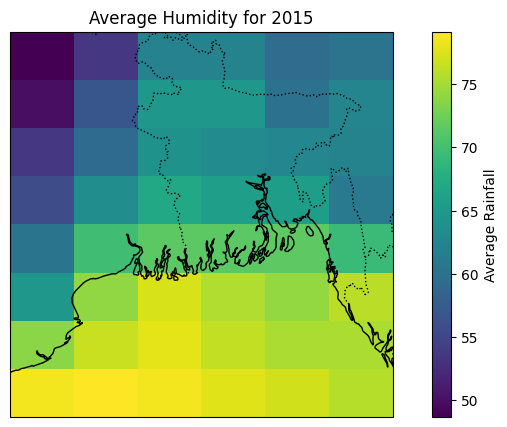

In [ ]:


import pandas as pd
import xarray as xr
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gcsfs

# Assuming 'tas_simulated_day_IPSL-CM6A-LR_r1i1p1f1_gr1.nc' exists from previous execution
ds = xr.open_dataset('/content/Simulated projection.nc')
print(ds.info())

# Open the modified dataset
ds = xr.open_dataset('/content/Simulated projection.nc')

# Calculate the annual average
ds_annual = ds.groupby('time.year').mean()

# Select the first year's average
first_year_avg = ds_annual.sel(year=ds_annual.year[0])

# Create the plot
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
# Plot the data
first_year_avg['hur'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Average Rainfall'})

# Set the title and labels
plt.title(f'Average Humidity for {ds_annual.year[0].values}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Gridding of BMD observed: Just in case!

**Linear**

In [ ]:
# Required packages:
# - numpy
# - pandas
# - geopandas
# - rasterio
# - scipy
# - xarray

import sys

required_packages = ['numpy', 'pandas', 'geopandas', 'rasterio', 'scipy' , 'pykrige' , 'xarray']

missing_packages = []
for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        missing_packages.append(package)

if missing_packages:
    print(f"The following packages are missing and need to be installed: {', '.join(missing_packages)}")
    print("You can install them using pip:")
    for package in missing_packages:
        print(f"!pip install {package}") # Changed 'pip install' to '!pip install' to run in a notebook environment
        !pip install {package} # Actually installing the package within the loop
    # sys.exit(1)  # Commented out to allow the script to continue after installing
else:
    print("All required packages are installed. You're ready to go!")

The following packages are missing and need to be installed: pykrige
You can install them using pip:
!pip install pykrige
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.7/909.7 kB 11.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
from scipy.interpolate import griddata
from datetime import datetime
from pathlib import Path

def process_rainfall_data(
    input_file: str,
    output_file: str,
    bounds: list = [21, 88, 24.5, 91.5],
    grid_size: int = 10,
    interpolation_method: str = 'cubic'
) -> xr.Dataset:
    """
    Process rainfall data from Excel file to NetCDF format with spatial interpolation.
    """
    try:
        # Print working directory and file path for debugging
        print(f"Looking for file: {input_file}")

        # Step 1: Load the Excel file
        rainfall_data = pd.read_excel('/content/avg_temp.xlsx')
        print(f"Successfully loaded {len(rainfall_data)} rows of data")

        # Print first few rows to verify data
        print("\nFirst few rows of data:")
        print(rainfall_data.head())

        # Step 2: Extract coordinates and data
        coords = rainfall_data[['Longitude', 'Latitude']].values
        dates = pd.to_datetime(rainfall_data['Date'])
        rainfall_values = rainfall_data['Temperature'].values

        # Print data statistics
        print(f"\nData statistics:")
        print(f"Number of unique coordinates: {len(np.unique(coords, axis=0))}")
        print(f"Date range: {dates.min()} to {dates.max()}")
        print(f"Rainfall range: {rainfall_values.min()} to {rainfall_values.max()}")
        print(f"Number of zero rainfall values: {np.sum(rainfall_values == 0)}")

        # Step 3: Use specified bounds
        lat_min, lon_min, lat_max, lon_max = bounds

        # Create grid
        lon_grid, lat_grid = np.meshgrid(
            np.linspace(lon_min, lon_max, grid_size),
            np.linspace(lat_min, lat_max, grid_size)
        )
        time = np.unique(dates)

        # Step 4: Interpolate data
        rainfall_grid = np.zeros((len(time), lat_grid.shape[0], lat_grid.shape[1]))

        for i, t in enumerate(time):
            t_idx = np.where(dates == t)[0]
            current_coords = coords[t_idx]
            current_values = rainfall_values[t_idx]

            # Only interpolate if we have varying values
            if len(np.unique(current_values)) > 1:
                interpolated = griddata(
                    current_coords,
                    current_values,
                    (lon_grid, lat_grid),
                    method=interpolation_method,
                    fill_value=0
                )
            else:
                # If all values are the same (e.g., all zeros), use that value
                interpolated = np.full_like(lon_grid, current_values[0], dtype=float)

            rainfall_grid[i] = interpolated

        # Step 5: Create xarray dataset
        rainfall_ds = xr.Dataset({
            'rainfall': (
                ['time', 'lat', 'lon'],
                rainfall_grid,
                {
                    'units': 'mm',
                    'long_name': 'Rainfall amount'
                }
            ),
            'lon': ('lon', np.linspace(lon_min, lon_max, lon_grid.shape[1])),
            'lat': ('lat', np.linspace(lat_min, lat_max, lat_grid.shape[0])),
            'time': ('time', time)
        })

        # Add metadata
        rainfall_ds.attrs.update({
            'crs': 'EPSG:4326',
            'title': 'Interpolated Rainfall Data',
            'creation_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'interpolation_method': interpolation_method,
            'grid_size': grid_size,
            'bounds': f"lat: [{lat_min}, {lat_max}], lon: [{lon_min}, {lon_max}]"
        })

        # Save to NetCDF
        rainfall_ds.to_netcdf(output_file)
        print(f"\nSuccessfully saved NetCDF file to: {output_file}")
        return rainfall_ds

    except Exception as e:
        print(f"Detailed error information: {str(e)}")
        raise

if __name__ == "__main__":
    try:
        dataset = process_rainfall_data(
            input_file='rainfall_data.xlsx',
            output_file='rainfall_trial_linear.nc',
            bounds=[21, 88, 24.5, 91.5],
            grid_size=10,
            interpolation_method='cubic'
        )
        print("Processing completed successfully!")
    except Exception as e:
        print(f"Error: {e}")

Looking for file: rainfall_data.xlsx
Successfully loaded 100809 rows of data

First few rows of data:
   Longitude  Latitude       Date  Temperature
0      90.37     22.70 2014-12-31         19.3
1      90.65     22.68 2014-12-31         19.0
2      88.82     25.63 2014-12-31         17.7
3      89.83     23.60 2014-12-31         18.5
4      89.21     23.17 2014-12-31         18.2

Data statistics:
Number of unique coordinates: 15
Date range: 1995-01-01 00:00:00 to 2014-12-31 00:00:00
Rainfall range: 8.7 to 35.2
Number of zero rainfall values: 0

Successfully saved NetCDF file to: rainfall_trial_linear.nc
Processing completed successfully!


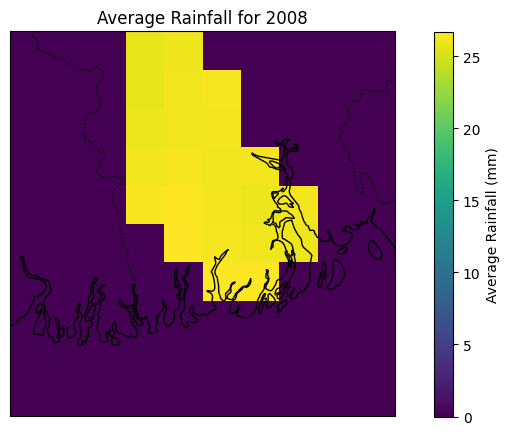

In [ ]:
# prompt: visualize rainfall_trial_linear.nc for the year 2008 rainfall average

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Open the dataset
ds = xr.open_dataset('/content/rainfall_trial_linear.nc')

# Select data for the year 2008 (assuming 'time' is a datetime variable)
ds_2008 = ds.sel(time='2010')

# Calculate the annual average for 2008
rainfall_2008_avg = ds_2008['rainfall'].mean(dim='time')

# Create the plot
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Plot the data
rainfall_2008_avg.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Average Rainfall (mm)'})

# Set the title and labels
plt.title('Average Rainfall for 2008')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Krigging**

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
from pathlib import Path
from pykrige.ok import OrdinaryKriging

def validate_bounds(data_df, bounds):
    """
    Validate and adjust bounds based on input data.
    Returns corrected bounds and warns if data points are outside bounds.
    """
    actual_lat_min = data_df['Latitude'].min()
    actual_lat_max = data_df['Latitude'].max()
    actual_lon_min = data_df['Longitude'].min()
    actual_lon_max = data_df['Longitude'].max()

    print(f"\nData extent:")
    print(f"Latitude range: {actual_lat_min:.4f} to {actual_lat_max:.4f}")
    print(f"Longitude range: {actual_lon_min:.4f} to {actual_lon_max:.4f}")

    # Ensure bounds are in correct order
    lat_min = min(bounds[0], bounds[2])
    lat_max = max(bounds[0], bounds[2])
    lon_min = min(bounds[1], bounds[3])
    lon_max = max(bounds[1], bounds[3])

    # Check if data points are within bounds
    if (actual_lat_min < lat_min or actual_lat_max > lat_max or
        actual_lon_min < lon_min or actual_lon_max > lon_max):
        print("\nWarning: Some data points are outside specified bounds!")
        print("Consider using these bounds based on data extent:")
        print(f"[{actual_lat_min:.8f}, {actual_lon_min:.8f}, {actual_lat_max:.8f}, {actual_lon_max:.8f}]")

    return [lat_min, lon_min, lat_max, lon_max]

def process_rainfall_data(
    input_file: str,
    output_file: str,
    bounds: list = [21, 88, 24.5, 91.5],
    grid_size: int = 10,
    variogram_model: str = 'spherical'
) -> xr.Dataset:
    """
    Process rainfall data from Excel file to NetCDF format using Ordinary Kriging interpolation.

    Parameters:
    -----------
    input_file: str
        Path to input Excel file
    output_file: str
        Path to output NetCDF file
    bounds: list
        [lat_min, lon_min, lat_max, lon_max]
    grid_size: int
        Number of points in each dimension of the output grid
    variogram_model: str
        Variogram model to use ('linear', 'power', 'gaussian', 'spherical', 'exponential')
    """
    try:
        # Print working directory and file path for debugging
        print(f"Looking for file: {input_file}")

        # Step 1: Load the Excel file
        rainfall_data = pd.read_excel(input_file)
        print(f"Successfully loaded {len(rainfall_data)} rows of data")

        # Print first few rows to verify data
        print("\nFirst few rows of data:")
        print(rainfall_data.head())

        # Validate and correct bounds
        bounds = validate_bounds(rainfall_data, bounds)
        lat_min, lon_min, lat_max, lon_max = bounds

        # Step 2: Extract coordinates and data
        coords = rainfall_data[['Longitude', 'Latitude']].values
        dates = pd.to_datetime(rainfall_data['Date'])
        rainfall_values = rainfall_data['Humidity'].values

        # Handle NaN values
        valid_idx = ~np.isnan(rainfall_values)
        coords = coords[valid_idx]
        dates = dates[valid_idx]
        rainfall_values = rainfall_values[valid_idx]

        # Print data statistics
        print(f"\nData statistics:")
        print(f"Number of unique coordinates: {len(np.unique(coords, axis=0))}")
        print(f"Date range: {dates.min()} to {dates.max()}")
        print(f"Rainfall range: {rainfall_values.min():.2f} to {rainfall_values.max():.2f}")
        print(f"Number of valid measurements: {len(rainfall_values)}")

        # Create grid
        lon_grid = np.linspace(lon_min, lon_max, grid_size)
        lat_grid = np.linspace(lat_min, lat_max, grid_size)
        lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)
        time = np.unique(dates)

        # Step 4: Interpolate data using Ordinary Kriging
        rainfall_grid = np.zeros((len(time), grid_size, grid_size))

        for i, t in enumerate(time):
            t_idx = np.where(dates == t)[0]
            current_coords = coords[t_idx]
            current_values = rainfall_values[t_idx]

            if len(current_values) > 0:  # Check if we have any valid data for this timestamp
                if len(np.unique(current_values)) > 1:
                    try:
                        # Create and fit the kriging model
                        OK = OrdinaryKriging(
                            x=current_coords[:, 0],  # longitude
                            y=current_coords[:, 1],  # latitude
                            z=current_values,
                            variogram_model=variogram_model,
                            verbose=False,
                            enable_plotting=False,
                        )

                        # Make predictions on the grid
                        z_pred, _ = OK.execute('grid', lon_grid, lat_grid)
                        rainfall_grid[i] = z_pred
                    except Exception as e:
                        print(f"Warning: Kriging failed for timestamp {t}, using nearest neighbor. Error: {str(e)}")
                        # Fallback to nearest neighbor interpolation
                        for j in range(grid_size):
                            for k in range(grid_size):
                                distances = np.sqrt(
                                    (current_coords[:, 0] - lon_grid[k])**2 +
                                    (current_coords[:, 1] - lat_grid[j])**2
                                )
                                rainfall_grid[i, j, k] = current_values[np.argmin(distances)]
                else:
                    # If all values are the same, use that value
                    rainfall_grid[i] = np.full((grid_size, grid_size), current_values[0])
            else:
                # No valid data for this timestamp
                rainfall_grid[i] = np.nan

        # Step 5: Create xarray dataset
        rainfall_ds = xr.Dataset({
            'rainfall': (
                ['time', 'lat', 'lon'],
                rainfall_grid,
                {
                    'units': 'mm',
                    'long_name': 'Rainfall amount'
                }
            ),
            'lon': ('lon', lon_grid),
            'lat': ('lat', lat_grid),
            'time': ('time', time)
        })

        # Add metadata
        rainfall_ds.attrs.update({
            'crs': 'EPSG:4326',
            'title': 'Kriging Interpolated Rainfall Data',
            'creation_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'interpolation_method': f'Ordinary Kriging ({variogram_model} variogram)',
            'grid_size': grid_size,
            'bounds': f"lat: [{lat_min}, {lat_max}], lon: [{lon_min}, {lon_max}]"
        })

        # Save to NetCDF
        rainfall_ds.to_netcdf(output_file)
        print(f"\nSuccessfully saved NetCDF file to: {output_file}")
        return rainfall_ds

    except Exception as e:
        print(f"Detailed error information: {str(e)}")
        raise

if __name__ == "__main__":
    try:
        dataset = process_rainfall_data(
            input_file='avg_temp.xlsx',
            output_file='rainfall_kriging.nc',
            bounds=[21.5, 88, 24.5, 91.5],
            grid_size=10,
            variogram_model='spherical'
        )
        print("Processing completed successfully!")
    except Exception as e:
        print(f"Error: {e}")

Looking for file: avg_temp.xlsx
Successfully loaded 102270 rows of data

First few rows of data:
   Longitude  Latitude       Date  Humidity  Unnamed: 4 Unnamed: 5
0      90.37     22.70 1995-01-01        82         NaN        NaN
1      90.65     22.68 1995-01-01        82         NaN        NaN
2      88.82     25.63 1995-01-01        68         NaN        NaN
3      89.83     23.60 1995-01-01        65         NaN        NaN
4      89.21     23.17 1995-01-01        69         NaN        NaN

Data extent:
Latitude range: 21.9900 to 25.6300
Longitude range: 88.8200 to 91.1100

Consider using these bounds based on data extent:
[21.99000000, 88.82000000, 25.63000000, 91.11000000]

Data statistics:
Number of unique coordinates: 14
Date range: 1995-01-01 00:00:00 to 2014-12-31 00:00:00
Rainfall range: 33.00 to 100.00
Number of valid measurements: 102270

Successfully saved NetCDF file to: rainfall_kriging.nc
Processing completed successfully!


In [ ]:
# prompt: animate yearly average of rainfall_krigging.nc for 1995 to 2014 as gif

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import imageio
import os

# Open the dataset
ds = xr.open_dataset('/content/rainfall_krigging.nc')

# Define the years to animate
years = range(1995, 2015)  # Corrected years

# Create a directory to save the frames
output_dir = "animation_frames"
os.makedirs(output_dir, exist_ok=True)

# Create the animation
images = []
for year in years:
    try:
        # Select data for the current year
        ds_year = ds.sel(time=str(year))

        # Calculate the annual average for the current year
        rainfall_year_avg = ds_year['rainfall'].sum(dim='time')

        # Create the plot
        plt.figure(figsize=(10, 5))
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.OCEAN)

        # Plot the data
        rainfall_year_avg.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Average Rainfall (mm)'})

        # Set the title and labels
        plt.title(f'Rainfall for {year}')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')

        # Save the frame as a PNG file
        filename = os.path.join(output_dir, f"frame_{year}.png")
        plt.savefig(filename)
        plt.close()  # Close the plot to avoid memory issues

        images.append(imageio.imread(filename))

    except KeyError:
        print(f"Warning: Data for year {year} not found in the dataset. Skipping.")


# Create the GIF animation
imageio.mimsave('rainfall_animation.gif', images, fps=1)

print("Animation created successfully as rainfall_animation.gif")

<ipython-input-22-5f7b75629916>:51: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-22-5f7b75629916>:51: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-22-5f7b75629916>:51: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-22-5

Animation created successfully as rainfall_animation.gif


The average rainfall for 2014 is: -1486269954222402.00 mm


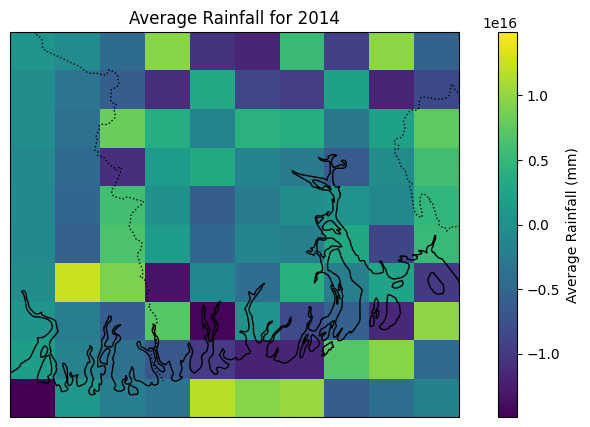

In [ ]:
# prompt: animate the year average temperature of rainfall_kriging.nc from 1995 to 2014 as gif

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import imageio
import numpy as np

# Open the dataset
ds = xr.open_dataset('/content/obsh_final input.nc')

# Select years 1995 to 2014 (adjust if your data has different years)
years = range(1995, 2015)  # Assuming your time variable is named 'time' and is datetime-like
images = []

for year in years:
    try:
        # Select data for the current year
        ds_year = ds.sel(time=str(year))

        # Calculate the annual average
        year_avg = ds_year['rainfall'].mean(dim='time')

        # Create the plot
        plt.figure(figsize=(10, 5))
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.OCEAN)

        # Plot the data
        im = year_avg.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis',
                           cbar_kwargs={'label': 'Average Temperature'})

        # Set the title and labels
        plt.title(f'Average Temperature for {year}')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')

        # Save the plot to a temporary file
        filename = f'/content/temp_{year}.png'
        plt.savefig(filename)
        plt.close()  # Close the plot to avoid memory issues
        images.append(imageio.imread(filename))

    except KeyError:
        print(f"Warning: Data for year {year} not found. Skipping.")
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")


# Create the GIF
imageio.mimsave('/content/temperature_animation.gif', images, fps=1)

FileNotFoundError: [Errno 2] No such file or directory: '/content/obsh_final input.nc'

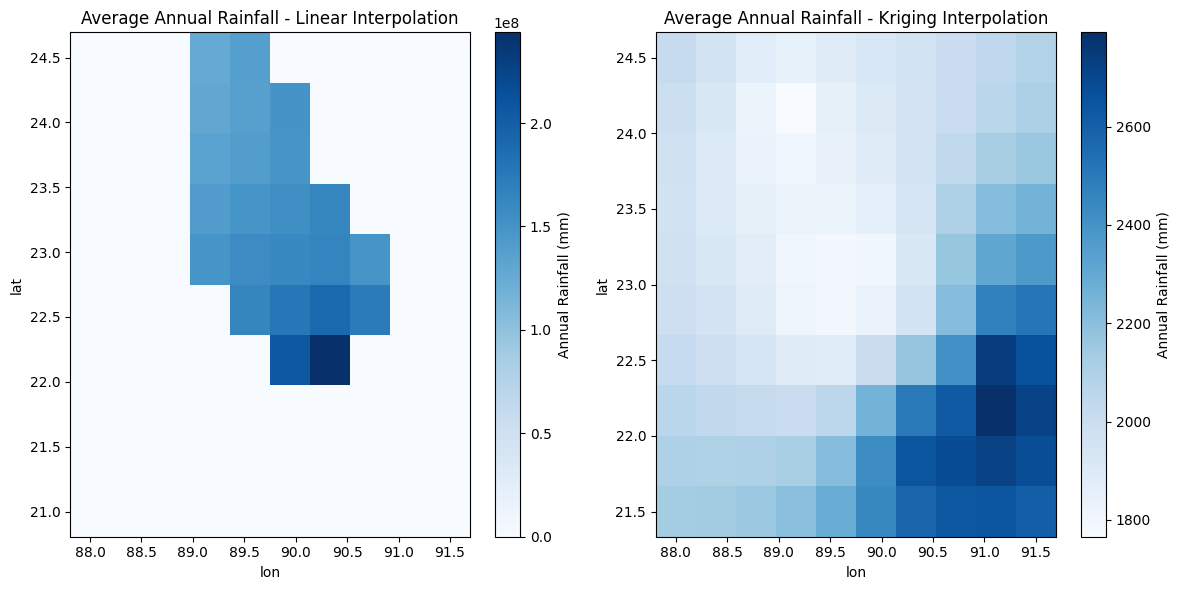

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# File paths
file1 = '/content/rainfall_trial_linear.nc'
file2 = '/content/rainfall_kriging.nc'

# Load datasets
ds1 = xr.open_dataset(file1)
ds2 = xr.open_dataset(file2)

# Extract precipitation data and convert units if needed
pr1 = ds1['rainfall'] * 86400  # Convert from kg/m^2/s to mm/day
rainfall2 = ds2['rainfall']  # Already in mm

# Calculate annual sums
annual_sum1 = pr1.groupby('time.year').sum(dim='time')
annual_sum2 = rainfall2.groupby('time.year').sum(dim='time')

# Calculate the mean of annual sums over all years
mean_annual_sum1 = annual_sum1.mean(dim='year')
mean_annual_sum2 = annual_sum2.mean(dim='year')

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': None})

# Plot dataset 1
im1 = mean_annual_sum1.plot(
    ax=axes[0],
    cmap='Blues',
    cbar_kwargs={'label': 'Annual Rainfall (mm)'}
)
axes[0].set_title('Average Annual Rainfall - Linear Interpolation')

# Plot dataset 2
im2 = mean_annual_sum2.plot(
    ax=axes[1],
    cmap='Blues',
    cbar_kwargs={'label': 'Annual Rainfall (mm)'}
)
axes[1].set_title('Average Annual Rainfall - Kriging Interpolation')

# Adjust layout
plt.tight_layout()
plt.show()


# Regridding the nc file to exactly match dimensions

In [ ]:
# prompt: Convert the temporal resolution to monthly for Observed historic.nc and Simulated historic.nc

import xarray as xr

def resample_to_monthly(filepath):
  """Resamples a NetCDF file to monthly resolution.

  Args:
    filepath: Path to the NetCDF file.

  Returns:
    An xarray Dataset with monthly resolution.
  """
  try:
    ds = xr.open_dataset(filepath)

    # Assuming 'time' is the time coordinate
    if 'time' not in ds.dims:
      raise ValueError("Dataset does not have a 'time' dimension.")

    # Resample to monthly frequency, taking the mean of each month
    ds_monthly = ds.resample(time='M').mean()

    return ds_monthly
  except FileNotFoundError:
      print(f"Error: File not found at {filepath}")
      return None
  except ValueError as e:
      print(f"Error: {e}")
      return None
  except Exception as e:
      print(f"An unexpected error occurred: {e}")
      return None


# Example usage for both files
monthly_observed = resample_to_monthly('/content/Observed historic.nc')
if monthly_observed is not None:
  monthly_observed.to_netcdf('/content/Observed_monthly.nc')
  print("Successfully resampled 'Observed historic.nc' to monthly resolution.")

monthly_simulated = resample_to_monthly('/content/Simulated historic.nc')
if monthly_simulated is not None:
  monthly_simulated.to_netcdf('/content/Simulated_monthly.nc')
  print("Successfully resampled 'Simulated historic.nc' to monthly resolution.")

/usr/local/lib/python3.10/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


Successfully resampled 'Observed historic.nc' to monthly resolution.


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


Successfully resampled 'Simulated historic.nc' to monthly resolution.


In [ ]:
import xarray as xr

# Load the dataset
ds = xr.open_dataset('/content/Simulated_monthly.nc')

# Drop the 'bnds' dimension
ds = ds.drop_dims('bnds', errors='ignore')  # Ignore error if 'bnds' doesn't exist

# Save the modified dataset back with the same name
ds.to_netcdf('/content/Simulated_Historic.nc')

# Check if the file was saved correctly
!ls -l /content/Simulated_monthly.nc


-rw-r--r-- 1 root root 85342 Jan 10 11:43 /content/Simulated_monthly.nc


In [ ]:
# prompt: Details of obsh.nc

import xarray as xr

# Open the dataset
ds = xr.open_dataset('/content/Simulated_Historic.nc')


# Print information about the dataset
print(ds.info())

# Print details of specific variables
for var_name in ds.variables:
  print(f"\nVariable: {var_name}")
ds[var_name]

xarray.Dataset {
dimensions:
	time = 240 ;
	lat = 8 ;
	lon = 6 ;

variables:
	float32 hur(time, lat, lon) ;
		hur:cell_measures = area: areacella ;
		hur:cell_methods = time: mean ;
		hur:comment = The relative humidity with respect to liquid water for T> 0 C, and with respect to ice for T<0 C. ;
		hur:history = 2020-05-27T07:44:37Z altered by CMOR: Converted type from 'd' to 'f'. ;
		hur:long_name = Relative Humidity ;
		hur:original_name = RELHUM (using vinth2p_ecmwf) ;
		hur:standard_name = relative_humidity ;
		hur:units = % ;
	float64 lat(lat) ;
		lat:axis = Y ;
		lat:bounds = lat_bnds ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
	float64 lon(lon) ;
		lon:axis = X ;
		lon:bounds = lon_bnds ;
		lon:long_name = Longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
	object time(time) ;
		time:axis = T ;
		time:bounds = time_bnds ;
		time:long_name = time ;
		time:standard_name = time ;

// global attributes:
	:Conv

<xarray.DataArray 'time' (time: 240)> Size: 2kB
array([cftime.DatetimeNoLeap(1995, 1, 31, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1995, 2, 28, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1995, 3, 31, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2014, 10, 31, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 31, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2kB 1995-01-31 00:00:00 ... 2014-12-31 00:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    long_name:      time
    standard_name:  time

In [ ]:
# prompt: Rename the 'rainfall' variable of Observed_monthly to 'hur'

# Open the dataset
ds = xr.open_dataset('/content/Observed_monthly.nc')

# Rename the variable
ds = ds.rename({'rainfall': 'hur'})

# Save the modified dataset back to the same file
ds.to_netcdf('/content/Observed_month.nc')

In [ ]:
# prompt: Regrid 3 nc files to exact same grids, with resolution of 0.25 degree

import xarray as xr
import numpy as np

def regrid_netcdf(input_file, output_file, resolution=0.25):
    """Regrids a NetCDF file to a specified resolution."""
    try:
        ds = xr.open_dataset(input_file)
        # Identify latitude and longitude variables
        lat_var = 'lat'  # Replace with actual latitude variable name if different
        lon_var = 'lon'  # Replace with actual longitude variable name if different

        if lat_var not in ds or lon_var not in ds:
            raise ValueError(f"Latitude '{lat_var}' or longitude '{lon_var}' variable not found in {input_file}")

        # Determine new grid
        lat_min = np.floor(ds[lat_var].min())
        lat_max = np.ceil(ds[lat_var].max())
        lon_min = np.floor(ds[lon_var].min())
        lon_max = np.ceil(ds[lon_var].max())

        new_lats = np.arange(lat_min, lat_max + resolution, resolution)
        new_lons = np.arange(lon_min, lon_max + resolution, resolution)

        # Regrid the dataset
        ds_regridded = ds.interp({lat_var: new_lats, lon_var: new_lons}, method='linear')

        # Save the regridded dataset
        ds_regridded.to_netcdf(output_file)
        print(f"Successfully regridded {input_file} to {output_file}")
        return ds_regridded

    except FileNotFoundError:
        print(f"Error: Input file not found - {input_file}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

# Example usage:
files_to_regrid = ['obsh.nc', 'simh.nc', 'simp.nc']
for file in files_to_regrid:
    regrid_netcdf(file, f"{file[:-3]}_regridded.nc")

Successfully regridded obsh.nc to obsh_regridded.nc
Successfully regridded simh.nc to simh_regridded.nc
Successfully regridded simp.nc to simp_regridded.nc


Error: File not found - obsh_regridded_cropped.nc
Error: File not found - simh_regridded_cropped.nc
Error: File not found - simp_regridded_cropped.nc


In [ ]:
# prompt: Crop 3 regridded nc files to the extent of lat(21.5, 24.5) and lon(88.5, 91.25)

import xarray as xr

def crop_netcdf(input_file, output_file, lat_min, lat_max, lon_min, lon_max):
    """Crops a NetCDF file to specified latitude and longitude bounds."""
    try:
        ds = xr.open_dataset(input_file)
        cropped_ds = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        cropped_ds.to_netcdf(output_file)
        print(f"Successfully cropped {input_file} to {output_file}")
    except FileNotFoundError:
        print(f"Error: Input file not found - {input_file}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage with specified lat/lon bounds
files_to_crop = ['obsh_regridded.nc', 'simh_regridded.nc', 'simp_regridded.nc']
lat_min, lat_max = 21.5, 24.5
lon_min, lon_max = 88.5, 91.25

for file in files_to_crop:
    crop_netcdf(file, f"{file[:-3]}_cropped.nc", lat_min, lat_max, lon_min, lon_max)

Successfully cropped obsh_regridded.nc to obsh_regridded_cropped.nc
Successfully cropped simh_regridded.nc to simh_regridded_cropped.nc
Successfully cropped simp_regridded.nc to simp_regridded_cropped.nc


In [ ]:
# # prompt: Change the name of variable 'rainfall' of obsh_regridded_cropped.nc to 'tas' and save

# # Open the dataset
# ds = xr.open_dataset('/content/obsh_regridded_cropped.nc')

# # Rename the 'rainfall' variable to 'tas'
# ds = ds.rename({'rainfall': 'tas'})

# # Save the modified dataset
# ds.to_netcdf('/content/obsh_regridded_cropped_tas.nc')

In [ ]:
# prompt: print the lat lon extents of 3 nc files

import xarray as xr

def print_latlon_extents(file_path):
    """Prints the latitude and longitude extents of a NetCDF file."""
    try:
        ds = xr.open_dataset(file_path)
        lat_min = float(ds.lat.min())
        lat_max = float(ds.lat.max())
        lon_min = float(ds.lon.min())
        lon_max = float(ds.lon.max())
        print(f"File: {file_path}")
        print(f"Latitude: ({lat_min:.2f}, {lat_max:.2f})")
        print(f"Longitude: ({lon_min:.2f}, {lon_max:.2f})")
        print("-" * 20)
    except FileNotFoundError:
        print(f"Error: File not found - {file_path}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# Call the function for each file
print_latlon_extents('obsh_regridded_cropped.nc')
print_latlon_extents('simh_regridded_cropped.nc')
print_latlon_extents('simp_regridded_cropped.nc')

File: obsh_regridded_cropped.nc
Latitude: (21.50, 24.50)
Longitude: (88.50, 91.25)
--------------------
File: simh_regridded_cropped.nc
Latitude: (21.50, 24.50)
Longitude: (88.50, 91.25)
--------------------
File: simp_regridded_cropped.nc
Latitude: (21.50, 24.50)
Longitude: (88.50, 91.25)
--------------------


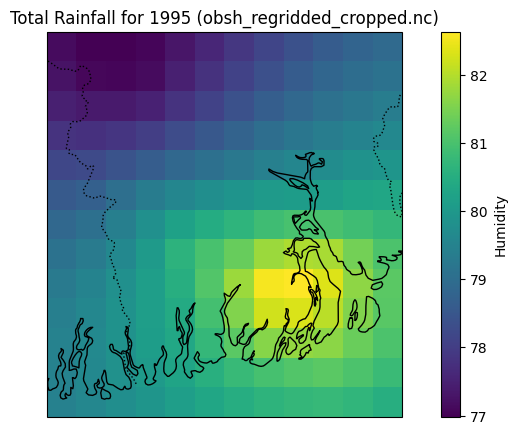

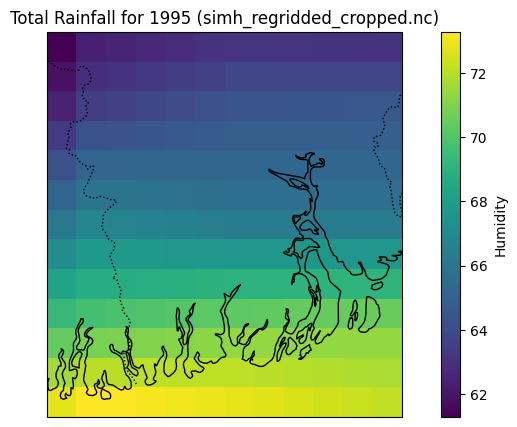

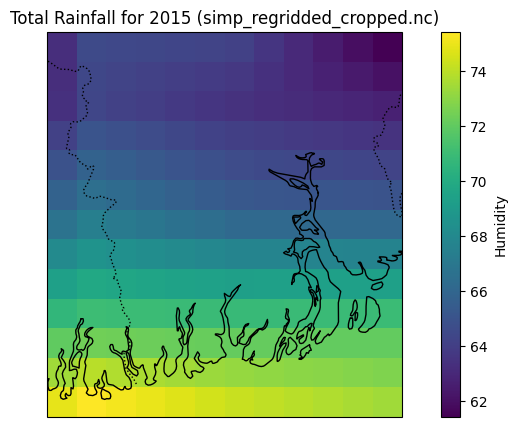

In [ ]:
# prompt: plot first year total rainfall of obsh.nc, simh.nc and simp.nc 3 image one by one

import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_first_year_rainfall(filepath):
  """Plots the total rainfall for the first year from a given NetCDF file."""
  try:
    ds = xr.open_dataset(filepath)
    ds_annual = ds.groupby('time.year').mean()
    first_year_sum = ds_annual.sel(year=ds_annual.year[0])

    plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)

    first_year_sum['hur'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Humidity'})
    plt.title(f'Total Rainfall for {ds_annual.year[0].values} ({filepath})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
  except FileNotFoundError:
    print(f"Error: File not found - {filepath}")
  except KeyError as e:
    print(f"Error: Key error in dataset - {e}")
  except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Call the function for each file
plot_first_year_rainfall('obsh_regridded_cropped.nc')
plot_first_year_rainfall('simh_regridded_cropped.nc')
plot_first_year_rainfall('simp_regridded_cropped.nc')

# Bias Corrrection!!!

In [ ]:
!pip install python-cmethods

In [ ]:
import xarray as xr

# Open datasets with decode_times=False to avoid initial decoding errors
obsh = xr.open_dataset("/content/obsh_regridded_cropped.nc", decode_times=False)
simh = xr.open_dataset("/content/simh_regridded_cropped.nc", decode_times=False)

# Replace the 'time' coordinate of obsh with the 'time' coordinate from simh
obsh = obsh.assign_coords(time=simh["time"])

# Save the modified obsh dataset with the updated time column
obsh.to_netcdf("/content/obsh_updated.nc")


In [ ]:
import xarray as xr
from cmethods import adjust
import cftime

# Open datasets with decode_times=False to avoid initial decoding errors
obsh = xr.open_dataset("/content/obsh_updated.nc")
simh = xr.open_dataset("/content/simh_regridded_cropped.nc")
simp = xr.open_dataset("/content/simp_regridded_cropped.nc")

# Decode time coordinates for simh and simp
# Assuming 'time' is the time coordinate variable name
# and it's based on 'days since' a reference date
simh = xr.decode_cf(simh, use_cftime=True)  # Decode time using cftime
simp = xr.decode_cf(simp, use_cftime=True)  # Decode time using cftime

# Reindex datasets to a common time coordinate
# This creates a new time coordinate based on the union of the three datasets' time coordinates
# Datasets are then reindexed to this common time coordinate, using interpolation to fill in missing values
common_time = xr.DataArray(
    data=obsh["time"].values,
    dims=["time"],
    coords={"time": obsh["time"].values},
)

# Reindex data variables
obs_data = obsh["hur"][:, 0, 0].reindex(time=common_time, method="nearest")
simh_data = simh["hur"][:, 0, 0].reindex(time=common_time, method="nearest")
simp_data = simp["hur"][:, 0, 0].reindex(time=common_time, method="nearest")


# adjust all grid cells
qdm_result = adjust(
    method="quantile_delta_mapping",
    obs=obsh["hur"],
    simh=simh["hur"],
    simp=simp["hur"],
    n_quantiles=1000,
    kind="+",
)

For simulated historical

In [ ]:
# import xarray as xr
# from cmethods import adjust
# import cftime

# # Open datasets with decode_times=False to avoid initial decoding errors
# obsh = xr.open_dataset("/content/obsh_regridded_cropped.nc")
# simh = xr.open_dataset("/content/simh_regridded_cropped.nc")
# simp = xr.open_dataset("/content/simp_regridded_cropped.nc")

# # Inspect time coordinates for debugging
# print("OBS time:", obsh["time"])
# print("SIMH time:", simh["time"])
# print("SIMP time:", simp["time"])

# # Decode time coordinates for simh and simp (use_cftime ensures consistency)
# simh["time"] = xr.decode_cf(simh).time
# simp["time"] = xr.decode_cf(simp).time

# # Create a common time coordinate (union of all time coordinates)
# common_time = xr.concat([obsh["time"], simh["time"], simp["time"]], dim="time").drop_duplicates("time")

# # Reindex datasets to the common time coordinate
# obsh_reindexed = obsh.reindex(time=common_time, method="nearest")
# simh_reindexed = simh.reindex(time=common_time, method="nearest")
# simp_reindexed = simp.reindex(time=common_time, method="nearest")

# # Ensure time is decoded properly after reindexing
# obsh_reindexed["time"] = xr.decode_cf(obsh_reindexed).time
# simh_reindexed["time"] = xr.decode_cf(simh_reindexed).time
# simp_reindexed["time"] = xr.decode_cf(simp_reindexed).time

# # Apply the adjust function using quantile delta mapping
# qdm_result1 = adjust(
#     method="quantile_delta_mapping",
#     obs=obsh_reindexed["tas"],
#     simh=simh_reindexed["tas"],
#     simp=simh_reindexed["tas"],
#     n_quantiles=1000,
#     kind="+",
# )

# # Save or process the results
# print(qdm_result1)


OBS time: <xarray.DataArray 'time' (time: 7300)> Size: 58kB
array(['1995-01-01T00:00:00.000000000', '1995-01-02T00:00:00.000000000',
       '1995-01-03T00:00:00.000000000', ..., '2014-12-29T00:00:00.000000000',
       '2014-12-30T00:00:00.000000000', '2014-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 58kB 1995-01-01 1995-01-02 ... 2014-12-31
SIMH time: <xarray.DataArray 'time' (time: 7300)> Size: 58kB
array(['1995-01-01T12:00:00.000000000', '1995-01-02T12:00:00.000000000',
       '1995-01-03T12:00:00.000000000', ..., '2014-12-29T12:00:00.000000000',
       '2014-12-30T12:00:00.000000000', '2014-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    height   float64 8B ...
  * time     (time) datetime64[ns] 58kB 1995-01-01T12:00:00 ... 2014-12-31T12...
Attributes:
    axis:           T
    bounds:         time_bounds
    long_name:      Time axis
    standard_name:  time
    time_origin:    1850-01-01 00:00

In [ ]:
# qdm_result1.to_netcdf("qdm_result_historical.nc")

<ipython-input-94-5d702ecc28e4>:1: UserWarning: Times can't be serialized faithfully to int64 with requested units 'days since 1850-01-01T12:00:00'. Serializing with units 'hours since 1850-01-01T12:00:00' instead. Set encoding['dtype'] to floating point dtype to serialize with units 'days since 1850-01-01T12:00:00'. Set encoding['units'] to 'hours since 1850-01-01T12:00:00' to silence this warning .
  qdm_result1.to_netcdf("qdm_result_historical.nc")


In [ ]:
# prompt: save qdm_result as nc file

# Save the qdm_result xarray Dataset to a NetCDF file
qdm_result.to_netcdf("qdm_result.nc")

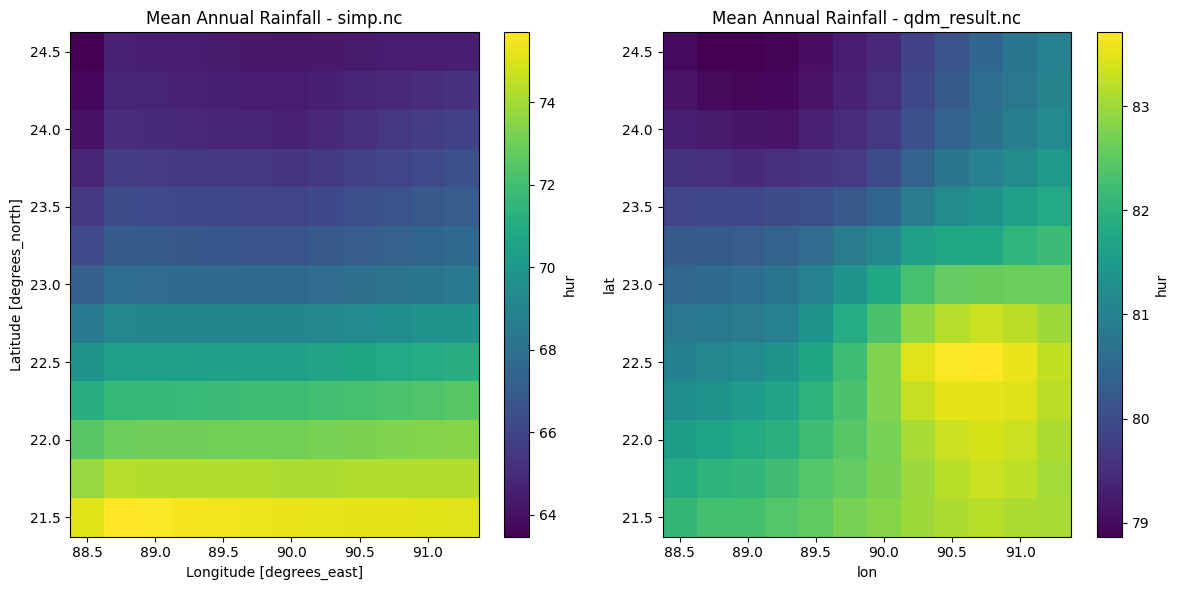

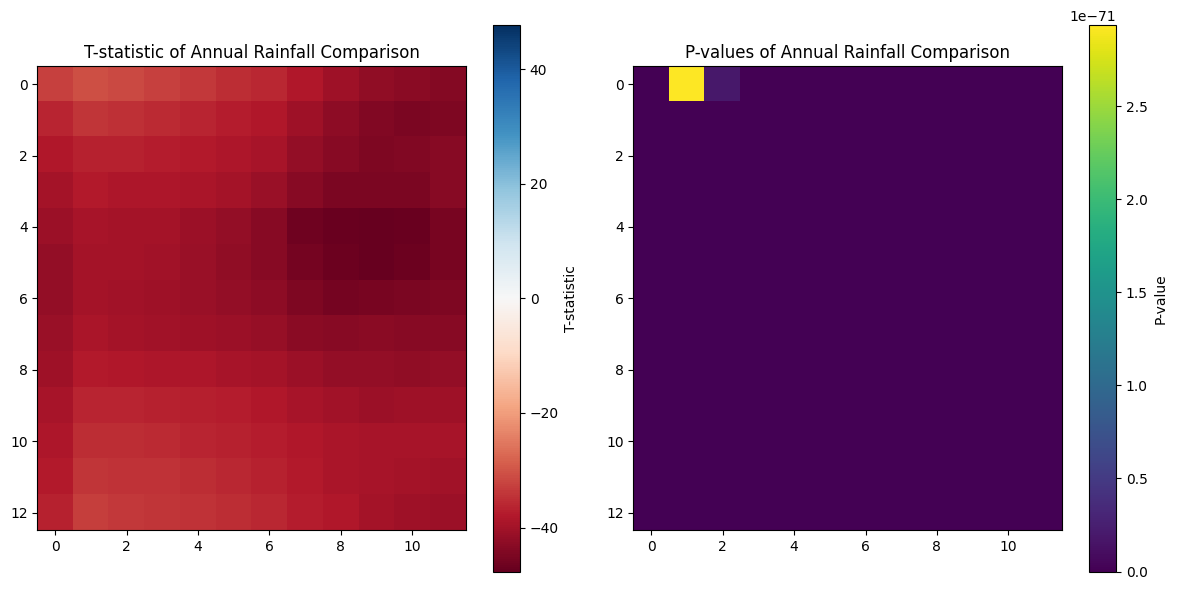

Spatial Correlation: 0.9666660602797331
RMSE: <xarray.DataArray 'hur' ()> Size: 8B
array(15.07368167)
Coordinates:
    plev     float64 8B 1e+05
Bias: <xarray.DataArray 'hur' ()> Size: 8B
array(-12.51685087)
Coordinates:
    plev     float64 8B 1e+05


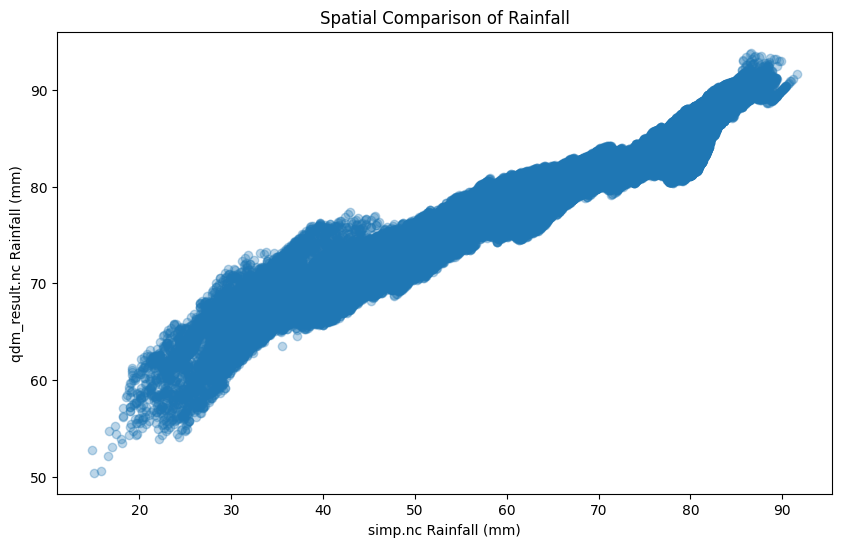

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load the datasets
simp = xr.open_dataset('simp_regridded_cropped.nc')
qdm_result = xr.open_dataset('qdm_result.nc')

# Assuming 'rainfall' is the variable name in both datasets. Adjust if different.
simp_rainfall = simp['hur']
qdm_rainfall = qdm_result['hur']

# Align datasets to ensure matching dimensions and coordinates
simp_rainfall, qdm_rainfall = xr.align(simp_rainfall, qdm_rainfall, join="inner")

# Temporal Comparison:
# 1. Calculate annual sums for both datasets
simp_annual = simp_rainfall.groupby('time.year').mean(dim='time')
qdm_annual = qdm_rainfall.groupby('time.year').mean(dim='time')

# 2. Calculate the mean annual rainfall for both datasets
mean_simp_annual = simp_annual.mean(dim='year')
mean_qdm_annual = qdm_annual.mean(dim='year')

# 3. Plot the mean annual rainfall for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
mean_simp_annual.plot(cmap='viridis')
plt.title('Mean Annual Rainfall - simp.nc')

plt.subplot(1, 2, 2)
mean_qdm_annual.plot(cmap='viridis')
plt.title('Mean Annual Rainfall - qdm_result.nc')

plt.tight_layout()
plt.show()

# 4. Statistical tests (e.g., t-test) for each grid cell across time
t_stats = np.zeros(simp_annual.shape[1:])
p_values = np.zeros(simp_annual.shape[1:])

for i in range(simp_annual.shape[1]):
    for j in range(simp_annual.shape[2]):
        t_stat, p_value = stats.ttest_ind(simp_annual[:, i, j].values, qdm_annual[:, i, j].values, nan_policy='omit')
        t_stats[i, j] = t_stat
        p_values[i, j] = p_value

# Plot t-statistics and p-values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(t_stats, cmap='RdBu', vmin=-np.max(np.abs(t_stats)), vmax=np.max(np.abs(t_stats)))
plt.colorbar(label='T-statistic')
plt.title('T-statistic of Annual Rainfall Comparison')

plt.subplot(1, 2, 2)
plt.imshow(p_values, cmap='viridis')
plt.colorbar(label='P-value')
plt.title('P-values of Annual Rainfall Comparison')

plt.tight_layout()
plt.show()

# Spatial Comparison:
# Calculate spatial statistics (e.g., correlation, RMSE, bias)
correlation = np.corrcoef(simp_rainfall.values.flatten(), qdm_rainfall.values.flatten())[0, 1]
rmse = np.sqrt(np.mean((simp_rainfall - qdm_rainfall) ** 2))
bias = np.mean(simp_rainfall - qdm_rainfall)

print(f"Spatial Correlation: {correlation}")
print(f"RMSE: {rmse}")
print(f"Bias: {bias}")

# Scatter Plot for visual comparison
plt.figure(figsize=(10, 6))
plt.scatter(simp_rainfall.values.flatten(), qdm_rainfall.values.flatten(), alpha=0.3)
plt.xlabel("simp.nc Rainfall (mm)")
plt.ylabel("qdm_result.nc Rainfall (mm)")
plt.title("Spatial Comparison of Rainfall")

plt.show()


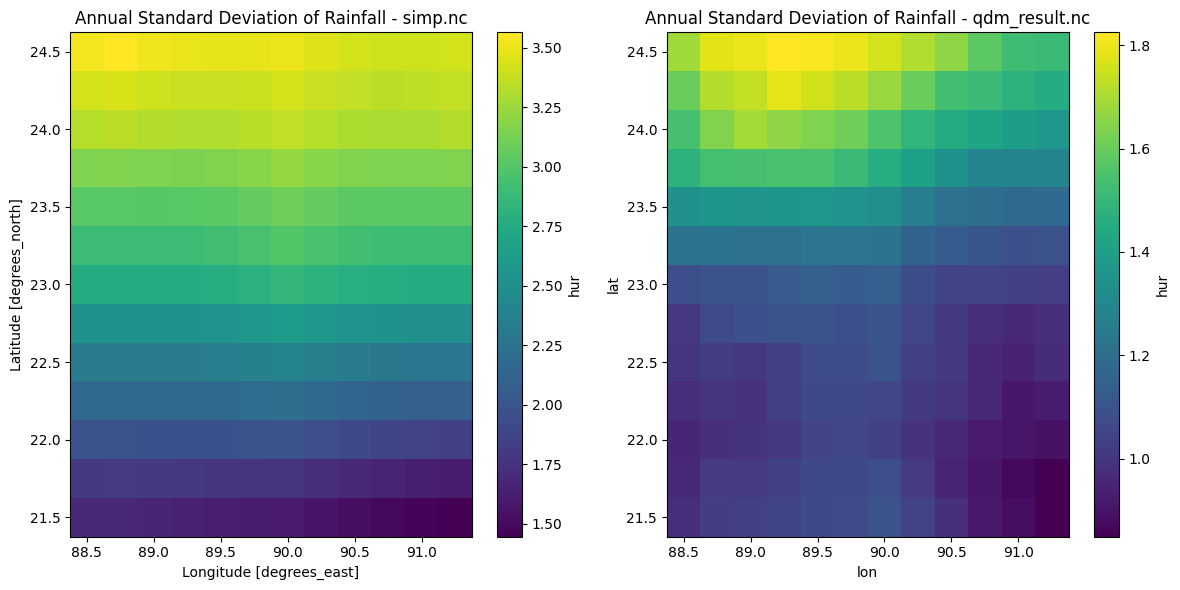

In [ ]:
# prompt: plot standard deviation of two nc files

import matplotlib.pyplot as plt

# Assuming simp_annual_std and qdm_annual_std are already calculated as in the provided code

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
simp_annual_std.plot(cmap='viridis')
plt.title('Annual Standard Deviation of Rainfall - simp.nc')

plt.subplot(1, 2, 2)
qdm_annual_std.plot(cmap='viridis')
plt.title('Annual Standard Deviation of Rainfall - qdm_result.nc')

plt.tight_layout()
plt.show()

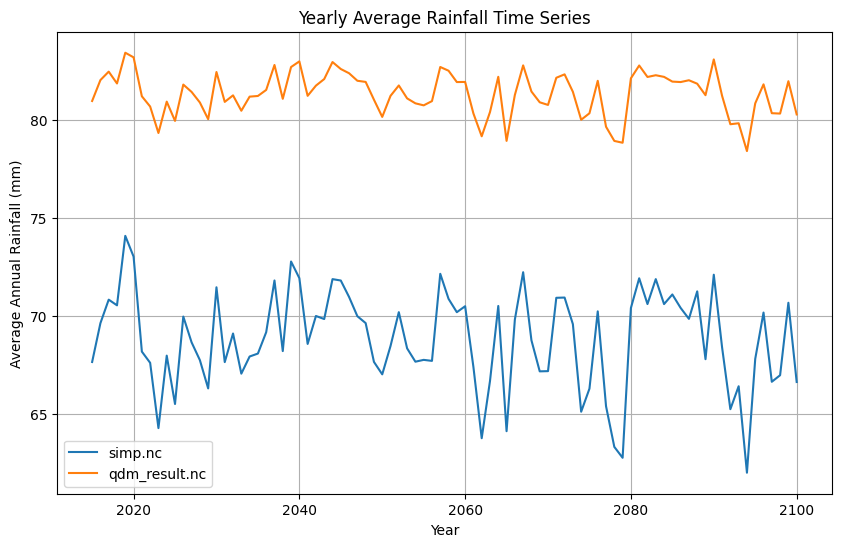

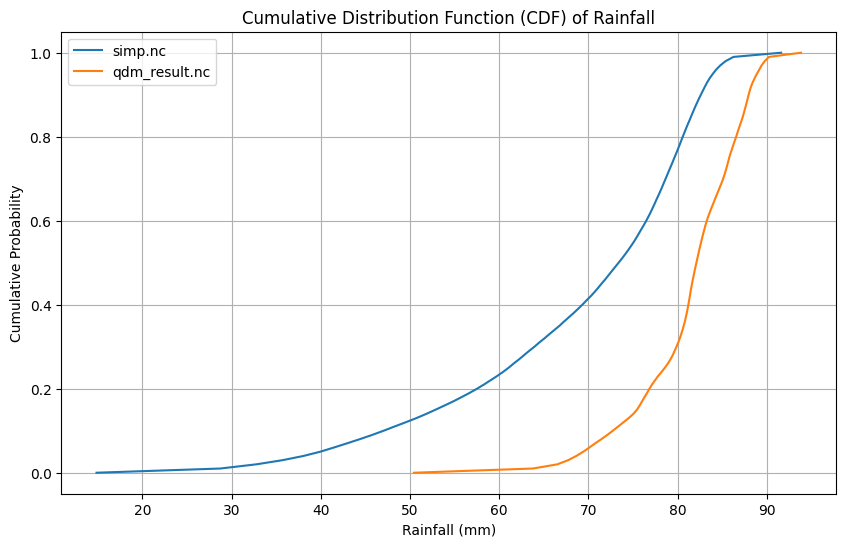

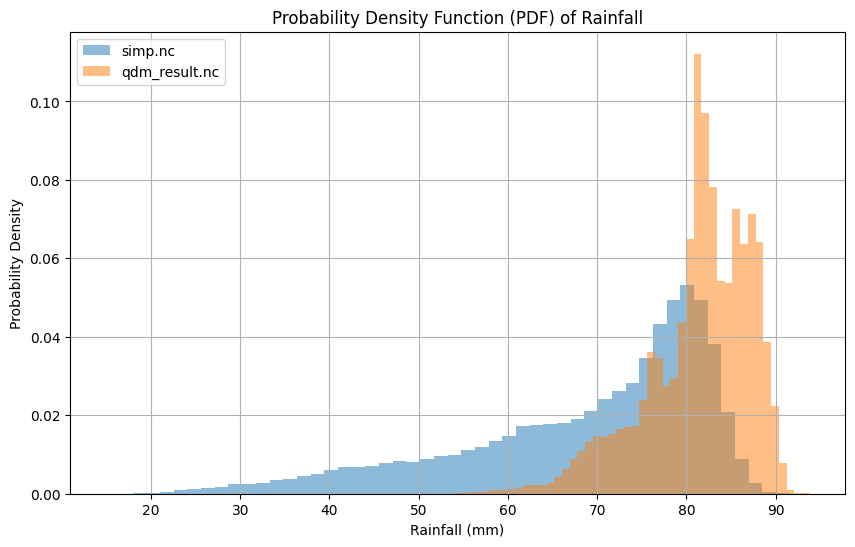

In [ ]:
# prompt: Yearly average time series plot of simp.nc and qdm _result.nc, also compare pdf and cdf

import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load the datasets
simp = xr.open_dataset('simp_regridded_cropped.nc')
qdm_result = xr.open_dataset('qdm_result.nc')

# Assuming 'rainfall' is the variable name in both datasets. Adjust if different.
simp_rainfall = simp['hur']
qdm_rainfall = qdm_result['hur']

# Calculate annual sums for both datasets
simp_annual = simp_rainfall.groupby('time.year').mean(dim='time')
qdm_annual = qdm_rainfall.groupby('time.year').mean(dim='time')

# Calculate annual mean and standard deviation
simp_annual_mean = simp_annual.mean(dim='year')
simp_annual_std = simp_annual.std(dim='year')

qdm_annual_mean = qdm_annual.mean(dim='year')
qdm_annual_std = qdm_annual.std(dim='year')


# Plotting Yearly Average Time Series

plt.figure(figsize=(10, 6))
plt.plot(simp_annual.year, simp_annual.mean(dim=('lat', 'lon')), label='simp.nc')
plt.plot(qdm_annual.year, qdm_annual.mean(dim=('lat', 'lon')), label='qdm_result.nc')
plt.xlabel('Year')
plt.ylabel('Average Annual Rainfall (mm)')
plt.title('Yearly Average Rainfall Time Series')
plt.legend()
plt.grid(True)
plt.show()


# CDF Comparison

# Calculate the cumulative distribution function (CDF) for both datasets
simp_cdf = simp_rainfall.quantile(np.arange(0, 1.01, 0.01))
qdm_cdf = qdm_rainfall.quantile(np.arange(0, 1.01, 0.01))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(simp_cdf, np.arange(0, 1.01, 0.01), label='simp.nc')
plt.plot(qdm_cdf, np.arange(0, 1.01, 0.01), label='qdm_result.nc')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Rainfall')
plt.legend()
plt.grid(True)
plt.show()

# PDF Comparison (using histograms for an approximation)
plt.figure(figsize=(10, 6))
plt.hist(simp_rainfall.values.flatten(), bins=50, alpha=0.5, label='simp.nc', density=True)
plt.hist(qdm_rainfall.values.flatten(), bins=50, alpha=0.5, label='qdm_result.nc', density=True)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF) of Rainfall')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import xarray as xr
from cmethods import adjust

# Open datasets with decode_times=False to avoid initial decoding errors
obsh = xr.open_dataset("/content/obsh_updated.nc")
simh = xr.open_dataset("/content/simh_regridded_cropped.nc")
simp = xr.open_dataset("/content/simp_regridded_cropped.nc")

# Inspect time coordinates for debugging
print("OBS time:", obsh["time"])
print("SIMH time:", simh["time"])
print("SIMP time:", simp["time"])

# Decode time coordinates for simh and simp (use_cftime ensures consistency)
simh["time"] = xr.decode_cf(simh).time
simp["time"] = xr.decode_cf(simp).time

# Create a common time coordinate (union of all time coordinates)
common_time = xr.concat([obsh["time"], simh["time"], simp["time"]], dim="time").drop_duplicates("time")

# Reindex datasets to the common time coordinate
obsh_reindexed = obsh.reindex(time=common_time, method="nearest")
simh_reindexed = simh.reindex(time=common_time, method="nearest")
simp_reindexed = simp.reindex(time=common_time, method="nearest")

# Ensure time is decoded properly after reindexing
obsh_reindexed["time"] = xr.decode_cf(obsh_reindexed).time
simh_reindexed["time"] = xr.decode_cf(simh_reindexed).time
simp_reindexed["time"] = xr.decode_cf(simp_reindexed).time

# Apply the adjust function using linear scaling with monthly grouping
result = adjust(
    method="linear_scaling",
    obs=obsh_reindexed["hur"],  # Use reindexed datasets
    simh=simh_reindexed["hur"],  # Use reindexed datasets
    simp=simp_reindexed["hur"],  # Use reindexed datasets
    kind="+",
    group="time.month"  # This is important!
)

# Save or process the results
print(result)

OBS time: <xarray.DataArray 'time' (time: 240)> Size: 2kB
array([cftime.DatetimeNoLeap(1995, 1, 31, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1995, 2, 28, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1995, 3, 31, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2014, 10, 31, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 31, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2kB 1995-01-31 00:00:00 ... 2014-12-31 00:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    long_name:      time
    standard_name:  time
SIMH time: <xarray.DataArray 'time' (time: 240)> Size: 2kB
array([cftime.DatetimeNoLeap(1995, 1, 31, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1995, 2, 28, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1995, 3, 31, 0, 0, 0, 0

In [ ]:
result.to_netcdf("ls_result.nc")

simp.nc Annual Mean Rainfall:
<xarray.DataArray 'hur' (lat: 13, lon: 12)> Size: 1kB
array([[901.57007031, 908.26205341, 907.25204805, 906.24204269,
        905.23203733, 904.22203197, 903.2120266 , 902.81991445,
        902.4278023 , 902.03569014, 901.64357799, 901.25146583],
       [885.49251829, 891.81077368, 891.49725366, 891.18373363,
        890.87021361, 890.55669358, 890.24317355, 890.48868824,
        890.73420293, 890.97971762, 891.22523231, 891.470747  ],
       [869.41496626, 875.35949395, 875.74245926, 876.12542457,
        876.50838988, 876.89135519, 877.2743205 , 878.15746204,
        879.04060357, 879.92374511, 880.80688664, 881.69002817],
       [853.40498131, 859.37164201, 860.00689025, 860.6421385 ,
        861.27738675, 861.912635  , 862.54788325, 863.90871098,
        865.26953871, 866.63036644, 867.99119417, 869.3520219 ],
       [837.49078764, 844.0408016 , 844.29857749, 844.55635338,
        844.81412927, 845.07190516, 845.32968106, 846.94144368,
        848.5532

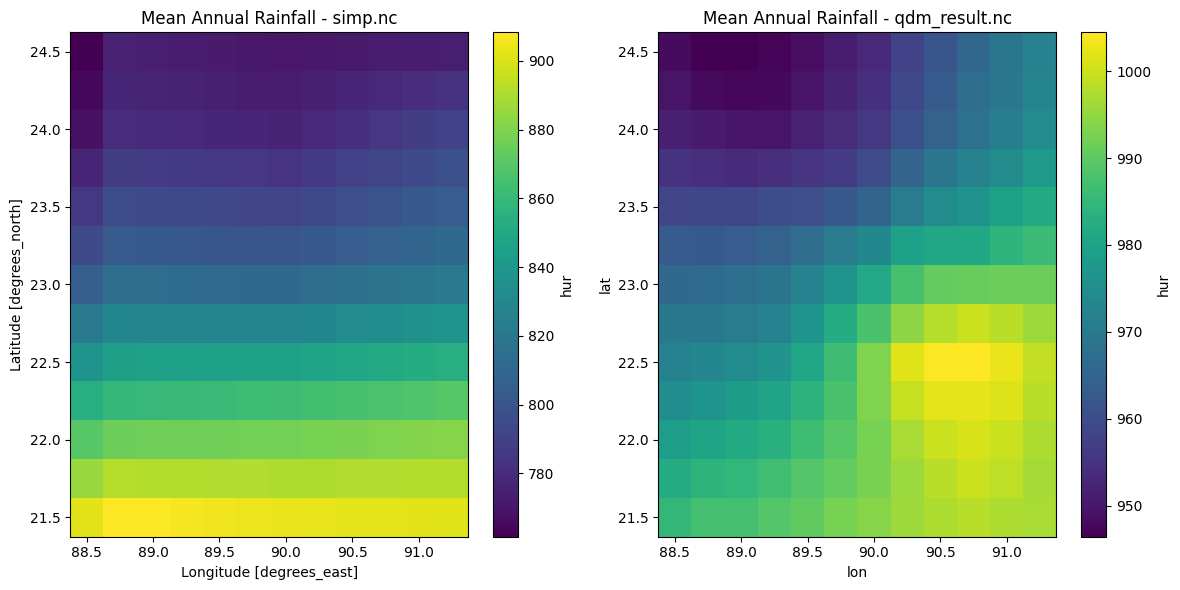

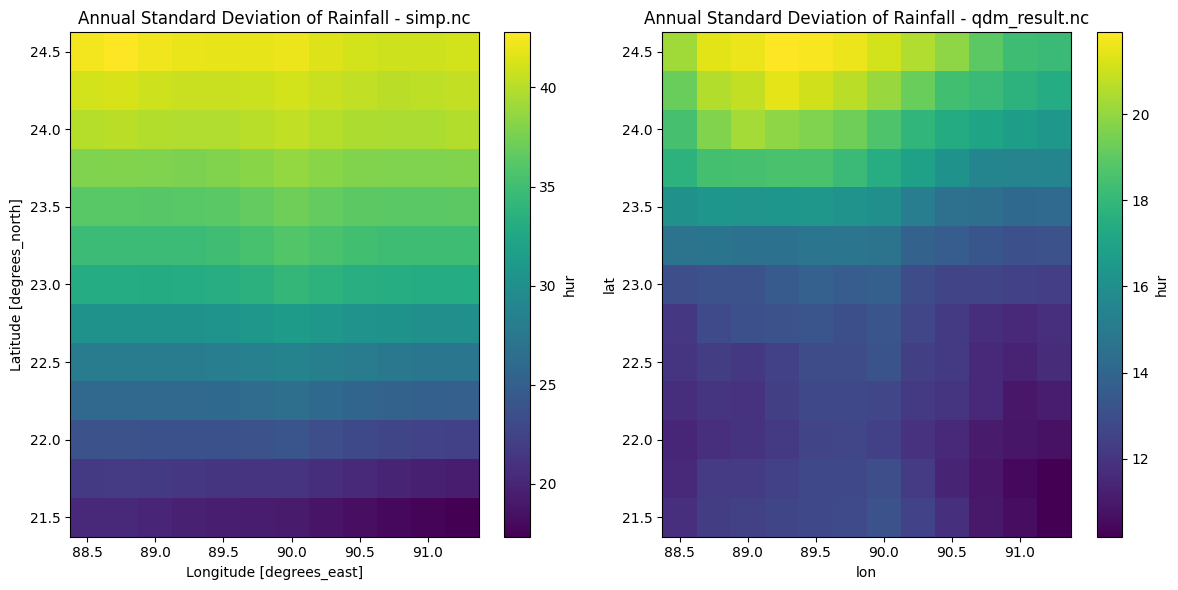

In [ ]:


# Calculate annual sums for both datasets
simp_annual = simp_rainfall.groupby('time.year').sum(dim='time')
qdm_annual = qdm_rainfall.groupby('time.year').sum(dim='time')

# Calculate annual mean and standard deviation
simp_annual_mean = simp_annual.mean(dim='year')
simp_annual_std = simp_annual.std(dim='year')

qdm_annual_mean = qdm_annual.mean(dim='year')
qdm_annual_std = qdm_annual.std(dim='year')

# Print or plot the results
print("simp.nc Annual Mean Rainfall:")
print(simp_annual_mean)
print("\nsimp.nc Annual Standard Deviation of Rainfall:")
print(simp_annual_std)

print("\nqdm_result.nc Annual Mean Rainfall:")
print(qdm_annual_mean)
print("\nqdm_result.nc Annual Standard Deviation of Rainfall:")
print(qdm_annual_std)

# Example plot (adjust as needed)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
simp_annual_mean.plot(cmap='viridis')
plt.title('Mean Annual Rainfall - simp.nc')

plt.subplot(1, 2, 2)
qdm_annual_mean.plot(cmap='viridis')
plt.title('Mean Annual Rainfall - qdm_result.nc')

plt.tight_layout()
plt.show()




import matplotlib.pyplot as plt

# Assuming simp_annual_std and qdm_annual_std are already calculated as in the provided code

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
simp_annual_std.plot(cmap='viridis')
plt.title('Annual Standard Deviation of Rainfall - simp.nc')

plt.subplot(1, 2, 2)
qdm_annual_std.plot(cmap='viridis')
plt.title('Annual Standard Deviation of Rainfall - qdm_result.nc')

plt.tight_layout()
plt.show()

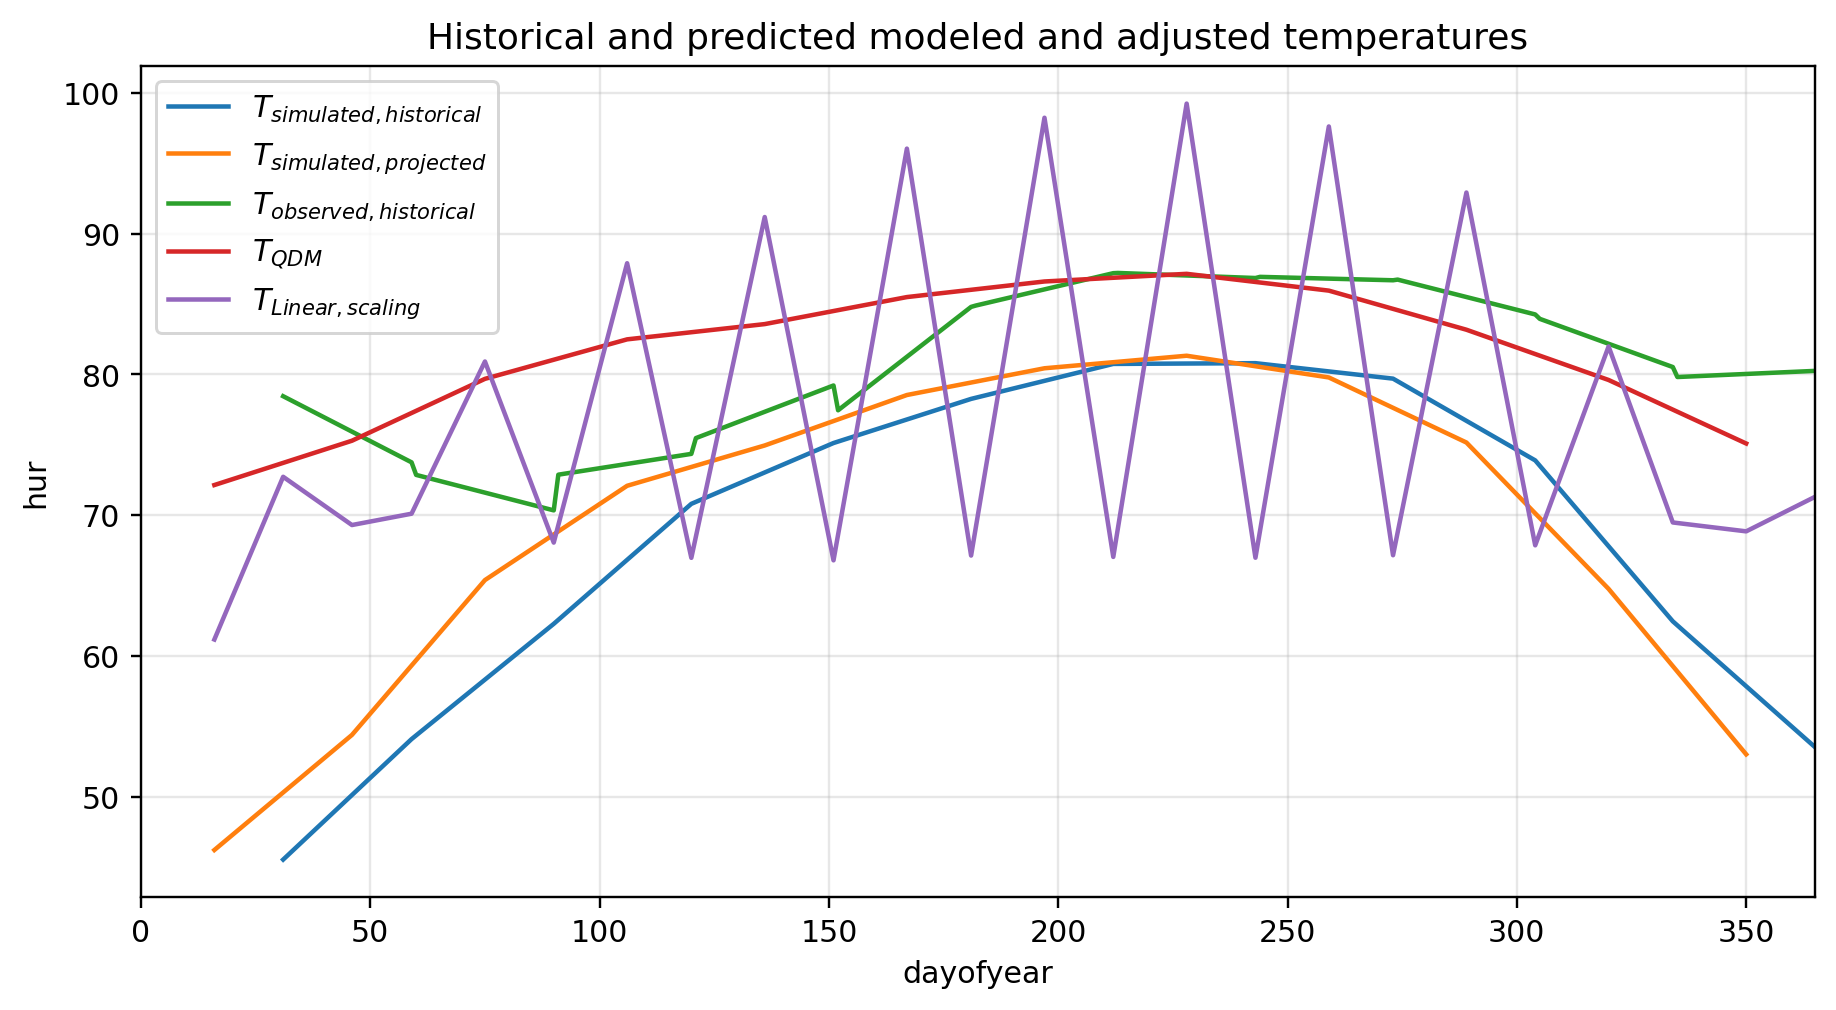

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
simh=xr.open_dataset("/content/simh_regridded_cropped.nc")
simp=xr.open_dataset("/content/simp_regridded_cropped.nc")
obsh=xr.open_dataset("/content/obsh_regridded_cropped.nc")
qdm_result=xr.open_dataset("/content/qdm_result.nc")
plt.figure(figsize=(10,5),dpi=216)
simh["hur"].groupby("time.dayofyear").mean(...).plot(label="$T_{simulated, historical}$")
simp["hur"].groupby("time.dayofyear").mean(...).plot(label="$T_{simulated, projected}$")
obsh["hur"].groupby("time.dayofyear").mean(...).plot(label="$T_{observed, historical}$")
qdm_result["hur"].groupby("time.dayofyear").mean(...).plot(label="$T_{QDM}$")
result["hur"].groupby("time.dayofyear").mean(...).plot(label="$T_{Linear, scaling}$")
plt.title("Historical and predicted modeled and adjusted temperatures")
plt.xlim(0,365)
plt.gca().grid(alpha=.3)
plt.legend();

In [ ]:


import xarray as xr

# Load the 'result.nc' dataset
try:
  result = xr.open_dataset('result.nc')
  print(result.info()) # Print information about the dataset
  print(result) # Print the dataset contents
except FileNotFoundError:
  print("'result.nc' not found. Please ensure the file exists in the current directory.")
except Exception as e:
  print(f"An error occurred: {e}")

xarray.Dataset {
dimensions:
	lat = 13 ;
	lon = 12 ;
	time = 45990 ;

variables:
	float64 lat(lat) ;
	float64 lon(lon) ;
	datetime64[ns] time(time) ;
	float64 height() ;
	float64 tas(time, lat, lon) ;

// global attributes:
}None
<xarray.Dataset> Size: 58MB
Dimensions:  (lat: 13, lon: 12, time: 45990)
Coordinates:
  * lat      (lat) float64 104B 21.5 21.75 22.0 22.25 ... 23.75 24.0 24.25 24.5
  * lon      (lon) float64 96B 88.5 88.75 89.0 89.25 ... 90.5 90.75 91.0 91.25
  * time     (time) datetime64[ns] 368kB 1995-01-01 ... 2100-12-31T12:00:00
    height   float64 8B ...
Data variables:
    tas      (time, lat, lon) float64 57MB ...


In [ ]:
!ls /content/
!ncdump -h /content/obsh_regridded_cropped.nc
!ncdump -h /content/simh_regridded_cropped.nc
!ncdump -h /content/simp_regridded_cropped.nc

Large_simh.nc		   pr_historical_day_GFDL-CM4_r1i1p1f1_gr1.nc  simh_regridded_cropped.nc
Large_simp.nc		   pr_simulated_day_GFDL-CM4_r1i1p1f1_gr1.nc   simh_regridded.nc
obsh.nc			   qdm_result.nc			       simp.nc
obsh_regridded_cropped.nc  sample_data				       simp_regridded_cropped.nc
obsh_regridded.nc	   simh.nc				       simp_regridded.nc
/bin/bash: line 1: ncdump: command not found
/bin/bash: line 1: ncdump: command not found
/bin/bash: line 1: ncdump: command not found
